In [19]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

In [2]:
np.pi

3.141592653589793

In [3]:
nLayers = 15
idx_odd = torch.arange(1, nLayers, 2)
idx_even = torch.arange(0, nLayers, 2)

# layers width
D = torch.zeros(nLayers, dtype=torch.double)
D[idx_odd] = 63.83
D[idx_even] = 102.74
D

tensor([102.7400,  63.8300, 102.7400,  63.8300, 102.7400,  63.8300, 102.7400,
         63.8300, 102.7400,  63.8300, 102.7400,  63.8300, 102.7400,  63.8300,
        102.7400], dtype=torch.float64)

In [4]:
# retraction index
N = torch.zeros(nLayers, dtype=torch.double)
N[idx_odd] = 1.46
N[idx_even] = 2.35
N_a = 1.
N_s = 1.52
N

tensor([2.3500, 1.4600, 2.3500, 1.4600, 2.3500, 1.4600, 2.3500, 1.4600, 2.3500,
        1.4600, 2.3500, 1.4600, 2.3500, 1.4600, 2.3500], dtype=torch.float64)

In [5]:
# sample M
j = 1
lmda = 450
phi = 2 * np.pi * D[j] * N[j] / lmda

real = [[torch.cos(phi),0], [0, torch.cos(phi)]]
imag = [[0, torch.sin(phi) / N[j]], [torch.sin(phi) * N[j], 0]]

M = torch.complex(torch.tensor(real), torch.tensor(imag))
M

tensor([[0.2663+0.0000j, 0.0000+0.6602j],
        [0.0000+1.4073j, 0.2663+0.0000j]], dtype=torch.complex128)

In [13]:
def LayerM(j, lmda, D, N):
    phi = 2 * np.pi * D[j] * N[j] / lmda
    real = [[torch.cos(phi),0], [0, torch.cos(phi)]]
    imag = [[0, torch.sin(phi) / N[j]], [torch.sin(phi) * N[j], 0]]
    return torch.complex(torch.tensor(real), torch.tensor(imag))

In [14]:
def CakeM(lmda, D, N):
    M = torch.eye(2, dtype=torch.complex128)
    for j in np.arange(nLayers-1, 0, -1):
        M_j = LayerM(j, lmda, D, N)
        M = M @ M_j
    return M

In [15]:
def Transmittance(M, N_a = 1., N_s = 1.52):
    return 2 * N_a / (N_a * M[0,0] + N_s * M[1,1] + N_a * N_s * M[0,1] + M[1,0])

In [16]:
def ETransmittance(M, N_a = 1., N_s = 1.52):
    t = Transmittance(M, N_a, N_s)
    return N_s * (t.real ** 2 + t.imag ** 2) / N_a

In [27]:
lambdas = torch.arange(400, 950, dtype=torch.double)
T = torch.zeros_like(lambdas)
for i, lmda in enumerate(lambdas):
    M = CakeM(lmda, D, N)
    T[i] = ETransmittance(M)

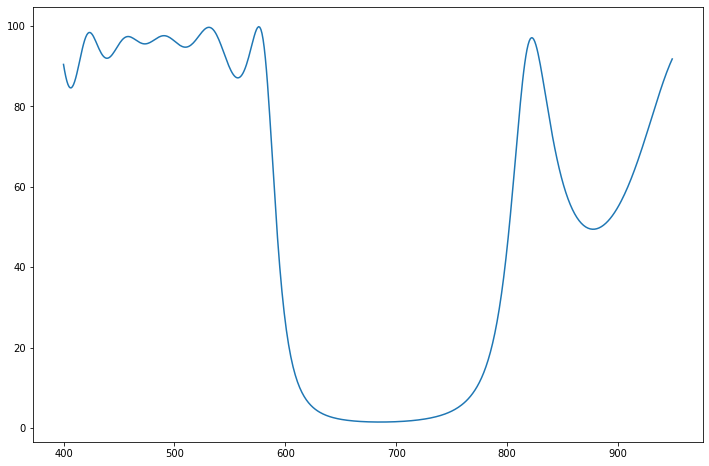

In [28]:
_=plt.plot(lambdas, 100*T)

In [30]:
T[::5]

tensor([0.9039, 0.8485, 0.8609, 0.9182, 0.9715, 0.9814, 0.9555, 0.9276, 0.9195,
        0.9324, 0.9543, 0.9703, 0.9726, 0.9650, 0.9569, 0.9555, 0.9616, 0.9705,
        0.9753, 0.9720, 0.9620, 0.9514, 0.9468, 0.9523, 0.9670, 0.9848, 0.9957,
        0.9904, 0.9661, 0.9298, 0.8945, 0.8730, 0.8747, 0.9036, 0.9537, 0.9956,
        0.9660, 0.8166, 0.5975, 0.4013, 0.2641, 0.1770, 0.1228, 0.0884, 0.0661,
        0.0511, 0.0408, 0.0335, 0.0283, 0.0244, 0.0215, 0.0194, 0.0178, 0.0166,
        0.0158, 0.0152, 0.0148, 0.0147, 0.0148, 0.0151, 0.0156, 0.0163, 0.0172,
        0.0184, 0.0199, 0.0219, 0.0243, 0.0273, 0.0310, 0.0357, 0.0417, 0.0494,
        0.0594, 0.0724, 0.0897, 0.1130, 0.1448, 0.1886, 0.2494, 0.3333, 0.4463,
        0.5889, 0.7471, 0.8854, 0.9619, 0.9609, 0.9031, 0.8218, 0.7405, 0.6700,
        0.6132, 0.5697, 0.5377, 0.5155, 0.5016, 0.4950, 0.4947, 0.5004, 0.5114,
        0.5278, 0.5492, 0.5755, 0.6065, 0.6419, 0.6811, 0.7233, 0.7672, 0.8112,
        0.8534, 0.8914], dtype=torch.flo